In [1]:
import os
import uuid
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

load_dotenv(override=True)
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

llm = ChatOpenAI(model="gpt-5-nano",temperature=0,api_key=OPENAI_API_KEY,streaming=True)

In [2]:
class EventState(TypedDict):
    trace_id: str
    user_input: str
    event_type: str
    response: str

In [3]:
def event_emitter(state: EventState):

    prompt = f"""
    Classify the user request into an event type:
    - research_event
    - risk_event
    - code_event

    User request:
    {state["user_input"]}

    Return only one label.
    """

    result = llm.invoke([HumanMessage(content=prompt)])

    event_type = result.content.strip().lower()

    return {
        "event_type": event_type
    }

In [4]:
def research_event_handler(state: EventState):

    prompt = f"""
    Provide a detailed research explanation for:

    {state["user_input"]}
    """

    print("\n--- Research Agent Triggered ---\n")

    response_text = ""

    for chunk in llm.stream([HumanMessage(content=prompt)]):
        if chunk.content:
            print(chunk.content, end="", flush=True)
            response_text += chunk.content

    return {
        "response": response_text
    }

In [5]:
def risk_event_handler(state: EventState):

    prompt = f"""
    Perform a risk and impact analysis for:

    {state["user_input"]}
    """

    print("\n--- Risk Analysis Agent Triggered ---\n")

    response_text = ""

    for chunk in llm.stream([HumanMessage(content=prompt)]):
        if chunk.content:
            print(chunk.content, end="", flush=True)
            response_text += chunk.content

    return {
        "response": response_text
    }

In [6]:
def code_event_handler(state: EventState):

    prompt = f"""
    Generate clean and well-commented Python code for:

    {state["user_input"]}
    """

    print("\n--- Code Agent Triggered ---\n")

    response_text = ""

    for chunk in llm.stream([HumanMessage(content=prompt)]):
        if chunk.content:
            print(chunk.content, end="", flush=True)
            response_text += chunk.content

    return {
        "response": response_text
    }

In [7]:
def route_event(state: EventState):
    return state["event_type"]

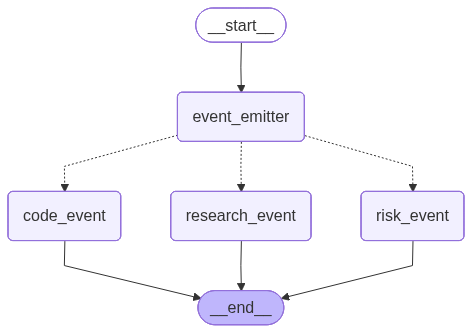

In [8]:
workflow = StateGraph(EventState)

workflow.add_node("event_emitter", event_emitter)
workflow.add_node("research_event", research_event_handler)
workflow.add_node("risk_event", risk_event_handler)
workflow.add_node("code_event", code_event_handler)

workflow.set_entry_point("event_emitter")

workflow.add_conditional_edges(
    "event_emitter",
    route_event,
    {
        "research_event": "research_event",
        "risk_event": "risk_event",
        "code_event": "code_event"
    }
)

workflow.add_edge("research_event", END)
workflow.add_edge("risk_event", END)
workflow.add_edge("code_event", END)

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
initial_state = {
    "trace_id": str(uuid.uuid4()),
    "user_input": "Analyze the risks of AI",
    "event_type": "",
    "response": ""
}

for event in graph.stream(initial_state):
    pass


--- Risk Analysis Agent Triggered ---

Here is a structured risk and impact analysis for AI systems in general (covering development, deployment, and operation across domains).

1) Purpose, scope, and what is analyzed
- Purpose: Identify key risks associated with AI systems (including foundation models, ML models, automation, and related workflows) and assess their potential impact.
- Scope: Risks across ethical/societal, technical/safety, data/privacy, security, governance, economic, and regulatory dimensions; affected stakeholders include individuals, organizations, and society at large.
- Timeframe: Both near-term (months) and longer-term horizon (years), with emphasis on probabilities and potential severity.

2) Key risk categories and brief descriptions
- Bias, discrimination, and fairness
  - Risks: AI decisions that systematically disadvantage protected groups; amplification of social inequities.
  - Impacts: Harms to individuals, reputational harm to organizations, erosion of 